## Data
The data that is used in this study comes from the EXIOBASE_3 Dataset, which aim is to describe the economical and physical fluxes that take place in the world, in a given time. It is a snapshot of the reality. 
It relies on two main principles : the input balance (the output must represent the same amount of matter as the input) and the process balance (an activity producing an output must have at least an equivalent load of input in terms of matter)
The term 'matter' used before can represent either a physical mass or energy, or a monetary amount. Therefore, these two principles are there to ensure that the conservation of mass, energy and money is respected (no money, mass or energy can be created from scratch).
There is another Dataset in the base, MR_HIOT, but I didn't use it as I focused on MR_HSUTs. If I understand well, MR_HSIOT can be obtained by MR_HSUts, by applying a model of the economy (a relation between supply and demand for instance) to the MR_HSUTs database (in this case the Stone method is used to define the model).

I focused on the year 2011, but I think it would be really interessant to combine those databases on multiple years in order to study the impact of economical indicators on economical growth or the evolution of CO2 GHG emissions for instance.

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [465]:
#loading of the data into pandas dataframes

HSUP = pd.read_csv('EXIOBASE_3_3_18_htot_2011\MR_HSUP_2011_v3_3_18.csv')
HUSE = pd.read_csv('EXIOBASE_3_3_18_htot_2011\MR_HUSE_2011_v3_3_18.csv')

dry_matter_coeffs_HSUTs = pd.read_excel('EXIOBASE_3_3_18_htot_2011\MR_HSUTs_2011_v3_3_18_dry_matter_coeff.xlsx')
FD_HSUTs = pd.read_csv('EXIOBASE_3_3_18_htot_2011\MR_HSUTs_2011_v3_3_18_FD.csv')
stock_to_waste_HSUTs = pd.read_csv('EXIOBASE_3_3_18_htot_2011\MR_HSUTs_2011_v3_3_18_stock_to_waste.csv')
waste_coefficients_HSUTs = pd.read_excel('EXIOBASE_3_3_18_htot_2011\MR_HSUTs_2011_v3_3_18_waste_coefficients.xlsx')

classifications_excel = pd.ExcelFile('EXIOBASE_3_3_18_htot_2011\Classifications_v_3_3_18.xlsx')
classifications = pd.read_excel(classifications_excel, sheet_name = 'Country')

extensions_HSUTs = {}
extension_excel = pd.ExcelFile('EXIOBASE_3_3_18_htot_2011\MR_HSUTs_2011_v3_3_18_extensions.xlsx')
for sheetname in extension_excel.sheet_names:
    extensions_HSUTs[sheetname] = pd.read_excel(extension_excel, sheet_name= sheetname)



C:\Users\marts\AppData\Local\Temp\ipykernel_24276\2007886992.py:3: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

In [466]:
#liste des pays pris en considérations
country_list = classifications['Country code']


# Analyse of the data for France

In this part, we will focus on the data for France. We will concentrate on the following points:
1) The use of the resources on the French territory. We will see how much resources the French extract each year and in what sectors they are used
2) The GHG emissions of France 

3) How France deals with waste

4) An overview of France's economy

This is only a brief analysis, which is very questionable in many aspects (is there a meaning to the addition of a mass of metal and of gaz, which have totally different densities?, or are the categories used to divide the data pertinent?...)

At each step, we will determine some features, that I hope will help to caraterize the French economy.


In [467]:
#this function will search in a vectorize way if a character is in a chain, it will enables us to select the columns we want in the dataFrames
def search_character(character, chaine):  
    return (character in chaine) or ('Unnamed' in chaine)
search_character = np.vectorize(search_character)

In [468]:
#Cut the extensions data to focus on France
extensions_HSUTs_FR = {}
for key in extensions_HSUTs.keys():
    columns = extensions_HSUTs[key].columns
    new_columns = extensions_HSUTs[key].iloc[0]
    new_columns[0] = 'resource'    
    new_columns[1] = 'unit'
    extensions_HSUTs_FR[key] = extensions_HSUTs[key][columns[search_character('FR',columns)]]
    new_columns = extensions_HSUTs_FR[key].iloc[0]
    extensions_HSUTs_FR[key].drop(0)
    extensions_HSUTs_FR[key].columns = new_columns


C:\Users\marts\AppData\Local\Temp\ipykernel_24276\3114599265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_columns[0] = 'resource'
C:\Users\marts\AppData\Local\Temp\ipykernel_24276\3114599265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_columns[1] = 'unit'


In [469]:
#Cut the extensions data to focus on France
extensions_HSUTs_FR = {}
for key in extensions_HSUTs.keys():
    columns = extensions_HSUTs[key].columns
    new_columns = extensions_HSUTs[key].iloc[0]
    new_columns[0] = 'resource'    
    new_columns[1] = 'unit'
    extensions_HSUTs_FR[key] = extensions_HSUTs[key][columns[search_character('FR',columns)]]
    new_columns = extensions_HSUTs_FR[key].iloc[0]
    extensions_HSUTs_FR[key].drop(0)
    extensions_HSUTs_FR[key].columns = new_columns


C:\Users\marts\AppData\Local\Temp\ipykernel_24276\3114599265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_columns[0] = 'resource'
C:\Users\marts\AppData\Local\Temp\ipykernel_24276\3114599265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_columns[1] = 'unit'


## Ressources use in France

We will not take into consideration the resources that are emitted through final consumation directly into biosphere (and could therefore be seen as a kind of renewal of resources), because those resources are generally not useful for the industry (on the opposite, they are most of the time polluting), and even if they can be useful, their emisssions are not controled, and the products of those emissions can't be used easily again (for example, the CO2 emitted by a factory is lost in the atmoshpere, and it will need to be extracted again before being possibly reused).


In [470]:
#loading of the data
resource_act = extensions_HSUTs_FR['resource_act']
resource_FD = extensions_HSUTs_FR['resource_FD']

emiss_act = extensions_HSUTs_FR['Emiss_act']
emiss_unregis_act = extensions_HSUTs_FR['Emis_unreg_w_act']

emiss_FD = extensions_HSUTs_FR['Emiss_FD']
emiss_unregis_FD = extensions_HSUTs_FR['Emis_unreg_w_FD']

resource_FR = resource_act
resource_FR = resource_FR.join(resource_FD.iloc[:, 3:])

resource_FR['Total'] = resource_FR.iloc[3:, 2:].sum(axis = 1)


In [471]:
feature_resource = resource_FR['Total'].fillna(0).sum()

[Text(0, 0.5, 'Total (Mm3 for the water consumption, Tonnes for the rest)'),
 Text(0.5, 1.0, 'Extraction of resources in France')]

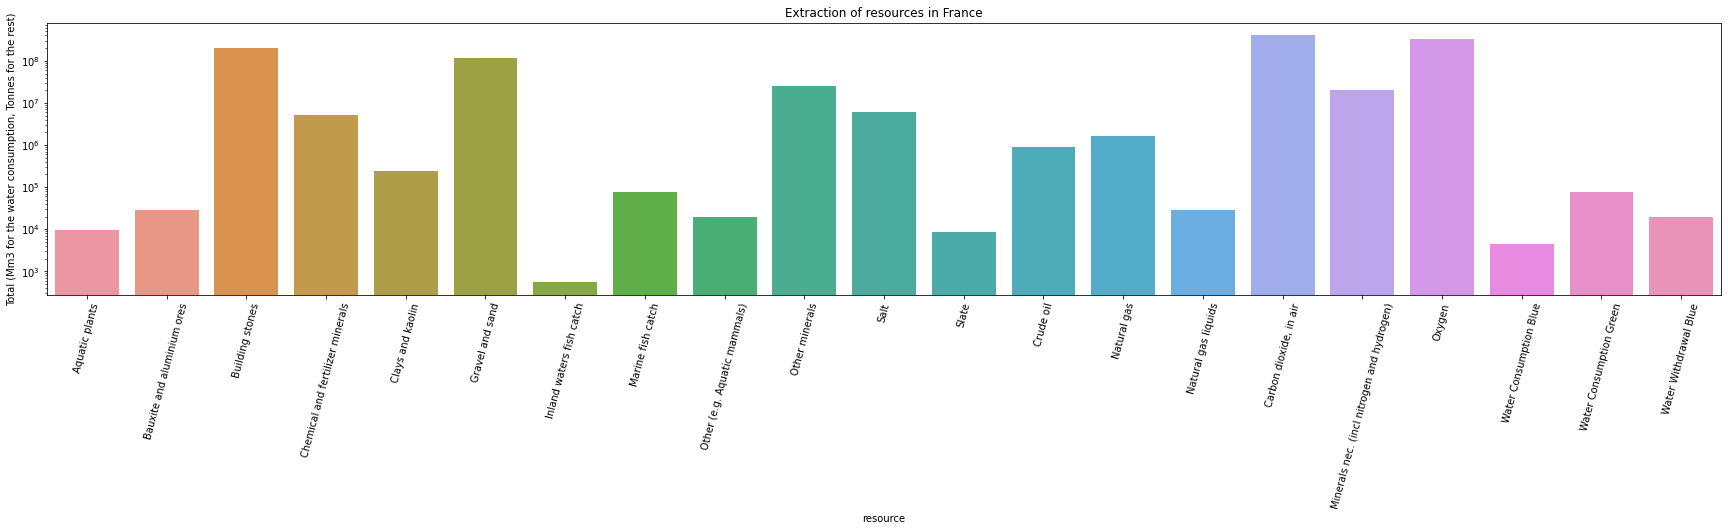

In [472]:
# Tracé du graphique
df = resource_FR
df = df.iloc[3:,:]
df = df[df['Total']!=0]
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df, x = 'resource', y = 'Total')
plot.set_yscale("log")
plot.set(ylabel = 'Total (Mm3 for the water consumption, Tonnes for the rest)', title= 'Extraction of resources in France')



## Impact on the climat
In this part, we will focus on the climatic impact of France, by analysing the emission of the main gases : C02, CH41, NH2.
The PRG to a hundred years has been found in the ADEME database. For most of the gases, notably the fluorinated gases coming from the caloportors fluids, a mean has been made on all the different species of those gases, among which the PRG can change a lot.

In [473]:
gaz_list = ['Carbon dioxide, fossil','Carbon dioxide, biogenic', 'CH4', 'N2O', 'HFCs', 'PFCs', 'SF6', 'CFCs','HCFCs', ]
PRG_list = [1,1, 25, 298, 2000, 9000,23500 , 8000, 700]


In [474]:
#building of dataFrames
data_PRG_act = pd.DataFrame(PRG_list, index = gaz_list, columns= ['PRG'])
emiss_act.set_index(emiss_act['resource'], inplace=True)
emiss_act.drop(['resource'], axis = 1, inplace = True)
data_GES_act = emiss_act.join(data_PRG_act, how = 'inner')
emissisions_GES_act  = pd.DataFrame(data_GES_act.iloc[:,3:-1].sum(axis = 1), columns = ['emissions_act'])
emissisions_GES_act['PRG_act'] = data_GES_act['PRG']
emissisions_GES_act['impact_act'] = emissisions_GES_act['emissions_act'] * emissisions_GES_act['PRG_act']
emiss_FR_act = emissisions_GES_act['impact_act'].sum()

data_PRG_unregis_act = pd.DataFrame(PRG_list, index = gaz_list, columns= ['PRG'])
emiss_unregis_act.set_index(emiss_unregis_act['resource'], inplace=True)
emiss_unregis_act.drop(['resource'], axis = 1, inplace = True)
data_GES_unregis_act = emiss_unregis_act.join(data_PRG_unregis_act, how = 'inner')
emissisions_GES_unregis_act  = pd.DataFrame(data_GES_unregis_act.iloc[:,3:-1].sum(axis = 1), columns = ['emissions_unreg_act'])
emissisions_GES_unregis_act['PRG_unreg_act'] = data_GES_unregis_act['PRG']
emissisions_GES_unregis_act['impact_unreg_act'] = emissisions_GES_unregis_act['emissions_unreg_act'] * emissisions_GES_unregis_act['PRG_unreg_act']
emiss_FR_unregis_act = emissisions_GES_unregis_act['impact_unreg_act'].sum()



data_PRG_FD = pd.DataFrame(PRG_list, index = gaz_list, columns= ['PRG'])
emiss_FD.set_index(emiss_FD['resource'], inplace=True)
emiss_FD.drop(['resource'], axis = 1, inplace = True)
data_GES_FD = emiss_FD.join(data_PRG_FD, how = 'inner')
emissisions_GES_FD  = pd.DataFrame(data_GES_FD.iloc[:,3:-1].sum(axis = 1), columns = ['emissions_FD'])
emissisions_GES_FD['PRG_FD'] = data_GES_FD['PRG']
emissisions_GES_FD['impact_FD'] = emissisions_GES_FD['emissions_FD'] * emissisions_GES_FD['PRG_FD']
emiss_FR_FD = emissisions_GES_FD['impact_FD'].sum()

data_PRG_unregis_FD = pd.DataFrame(PRG_list, index = gaz_list, columns= ['PRG'])
emiss_unregis_FD.set_index(emiss_unregis_FD['resource'], inplace=True)
emiss_unregis_FD.drop(['resource'], axis = 1, inplace = True)
data_GES_unregis_FD = emiss_unregis_FD.join(data_PRG_unregis_FD, how = 'inner')
emissisions_GES_unregis_FD  = pd.DataFrame(data_GES_unregis_FD.iloc[:,3:-1].sum(axis = 1), columns = ['emissions_unreg_FD'])
emissisions_GES_unregis_FD['PRG_unreg_FD'] = data_GES_unregis_FD['PRG']
emissisions_GES_unregis_FD['impact_unreg_FD'] = emissisions_GES_unregis_FD['emissions_unreg_FD'] * emissisions_GES_unregis_FD['PRG_unreg_FD']
emiss_FR_unregis_FD = emissisions_GES_unregis_FD['impact_unreg_FD'].sum()



emissions_FR = emissisions_GES_act.join(emissisions_GES_unregis_act, how = 'right')
emissions_FR = emissions_FR.join(emissisions_GES_FD, how = 'right' )
emissions_FR = emissions_FR.join(emissisions_GES_unregis_FD, how = 'right')
emissions_FR['PRG'] = emissions_FR['PRG_act']
emissions_FR = emissions_FR[['PRG','impact_act', 'impact_unreg_act', 'impact_FD', 'impact_unreg_FD']]


C:\Users\marts\AppData\Local\Temp\ipykernel_24276\522199873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emiss_act.drop(['resource'], axis = 1, inplace = True)
C:\Users\marts\AppData\Local\Temp\ipykernel_24276\522199873.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emiss_unregis_act.drop(['resource'], axis = 1, inplace = True)
C:\Users\marts\AppData\Local\Temp\ipykernel_24276\522199873.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [475]:
emissisions_GES_act_2 = emissisions_GES_act.copy()
emissisions_GES_act_2.columns = ['emissions', 'PRG', 'impact']
emissisions_GES_act_2['cat'] = 'act'

emissisions_GES_unregis_act_2 = emissisions_GES_unregis_act.copy()
emissisions_GES_unregis_act_2.columns = ['emissions', 'PRG', 'impact']
emissisions_GES_unregis_act_2['cat'] = 'unreg_act'

emissisions_GES_FD_2 = emissisions_GES_FD.copy()
emissisions_GES_FD_2.columns = ['emissions', 'PRG', 'impact']
emissisions_GES_FD_2['cat'] = 'FD'

emissisions_GES_unregis_FD_2 = emissisions_GES_unregis_FD.copy()
emissisions_GES_unregis_FD_2.columns = ['emissions', 'PRG', 'impact']
emissisions_GES_unregis_FD_2['cat'] = 'unreg_FD'


emissions_FR_2 = pd.concat([emissisions_GES_act_2, emissisions_GES_unregis_act_2])
emissions_FR_2 = pd.concat([emissions_FR_2, emissisions_GES_FD_2])
emissions_FR_2 = pd.concat([emissions_FR_2, emissisions_GES_unregis_FD_2])



In [476]:
emissisions_GES_act  = pd.DataFrame(data_GES_act.iloc[:,3:-1].sum(axis = 1), columns = ['emissions'])
emissisions_GES_act['gaz'] = emissisions_GES_act.index
emissisions_GES_act['PRG'] = data_GES_act['PRG']
emissisions_GES_act['Total_impact'] = emissisions_GES_act['emissions'] * emissisions_GES_act['PRG']
emiss_FR = emissisions_GES_act['Total_impact'].sum()
emissions_FR['Total'] = emissions_FR.iloc[:,1:].sum(axis = 1)


In [477]:
feature_GES = emissions_FR['Total'].sum()


[Text(0, 0.5, 'Total (tonnes équivalent CO2)'),
 Text(0.5, 1.0, 'Emission of GES in France')]

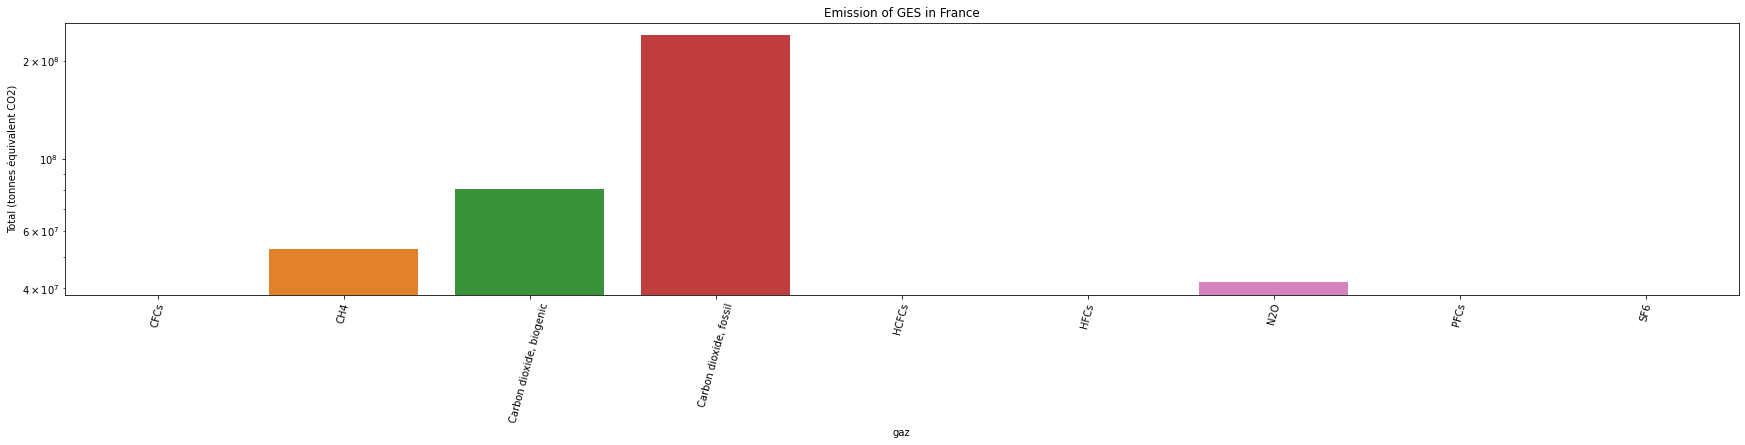

In [478]:

fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = emissisions_GES_act, x = 'gaz', y = 'Total_impact')
plot.set_yscale("log")
plot.set(ylabel = 'Total (tonnes équivalent CO2)', title= 'Emission of GES in France')


[Text(0, 0.5, 'Total (tonnes)'),
 Text(0.5, 1.0, 'Emission of gaz in France by consumer activities (green if registered, else red) or production activities (blue if registered, else orange)')]

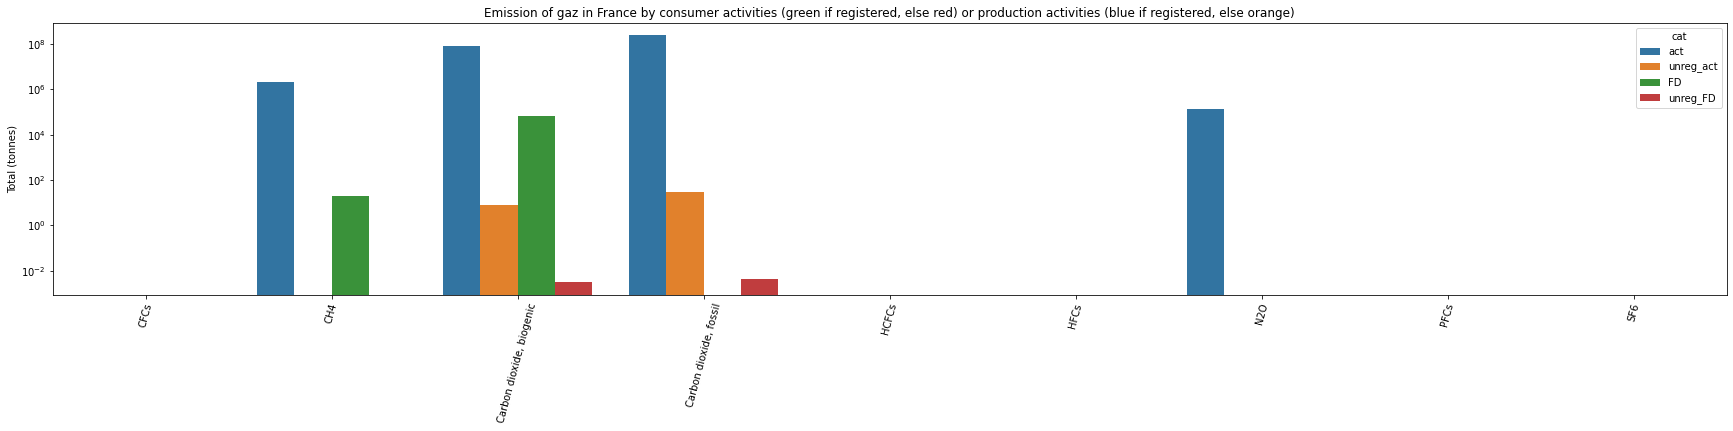

In [479]:

fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = emissions_FR_2, x = emissions_FR_2.index, y = 'emissions', hue = 'cat')
plot.set_yscale("log")
plot.set(ylabel = 'Total (tonnes)', title= 'Emission of gaz in France by consumer activities (green if registered, else red) or production activities (blue if registered, else orange)')



## Emissions par secteurs:


I made a list of sectors, that is defined below. This is not 100% accurate, and some activities or products could have been put in various categories, but I tried to follow more or less the order of the index that is proposed in the classifications. 


In [480]:
cat_list = ['Agriculture', 'fossil sources', 'Wood and fossils fuels', 'Matieres', 'petrole derivés', 'Mineral products', 'Metals', 'Machinery and devices',
 'Elec and gaz', 'Construction','transport', 'services', 'waste', 'Public', 'culture', 'other' ]
cat_sep = {
    'Agriculture':['01'], 'fossil sources' : ['10', '11' , '12'], 'Matieres' : ['14', '15', '16', '17', '18', '19'], 'Wood and fossils fuels': ['23.', '22', '21'], 'petrole derivés': ['24'], 'Mineral products':['25', '26'],
    'Metals': ['27'], 'Machinery and devices':['28', '3'], 'Elec and gaz' : ['40.'], 'Construction':['41', '42', '43', '44', '45'],
     'services':['5', '62', '63', '64', '65', '66', '67', '71', '72', '73', '74'],
    'transport':['60', '61'], 'Public':['75', '8', '91'], 'waste':['90'], 'culture':['92'], 'other':['93', '95', '99']
}

 


In [481]:
emissions_par_secteurs = pd.DataFrame(columns = cat_list, index = emiss_act.iloc[:,5][3:].index, dtype = float).fillna(0)

for k,act in enumerate(emiss_act.iloc[1][2:]):  
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    emissions_par_secteurs[cat] = emissions_par_secteurs[cat] + (emiss_act.iloc[:,k+2][3:].astype(float))

emissions_par_secteurs =  emissions_par_secteurs.loc[gaz_list].transpose()

emissions_par_secteurs = emissions_par_secteurs.dot(PRG_list)


[Text(0, 0.5, 'Total (tonnes équivalent CO2)'),
 Text(0.5, 1.0, 'Emission of GES (not including the one from FD) in France by sectors')]

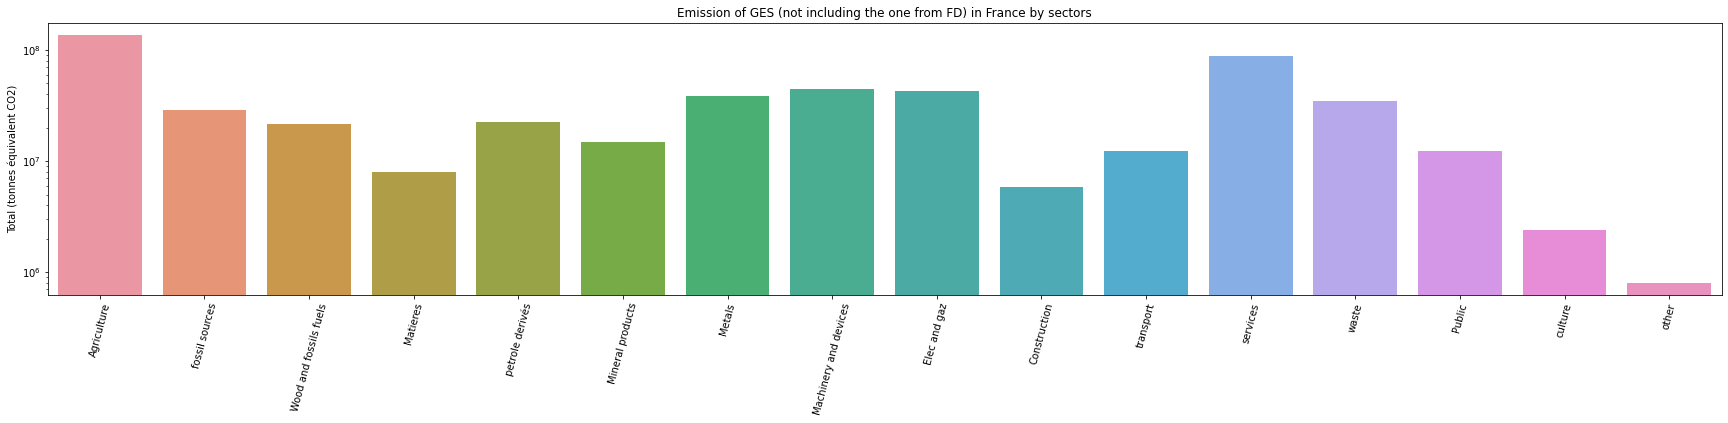

In [482]:

fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(x = cat_list, y = emissions_par_secteurs )
plot.set_yscale("log")
plot.set(ylabel = 'Total (tonnes équivalent CO2)', title= 'Emission of GES (not including the one from FD) in France by sectors')


# Waste use in France
We are now going to focus on the amount of waste that is produced by the French industry. We will also focus on the amount of waste that is reinjected in the industry, 
and on the exchange of waste between France and the other countries.

In [483]:
#buiding of the Dataframes
waste_supply_act_FR = extensions_HSUTs_FR['waste_sup_act']
waste_supply_act_FR['Total'] = waste_supply_act_FR.iloc[:,2:].sum(axis = 1)
waste_supply_act_FR = waste_supply_act_FR.iloc[3:,:]
waste_supply_act_FR['cat'] = 'act'

waste_supply_FD_FR = extensions_HSUTs_FR['waste_sup_FD']
waste_supply_FD_FR['Total'] = waste_supply_FD_FR.iloc[:,2:].sum(axis = 1)
waste_supply_FD_FR = waste_supply_FD_FR.iloc[3:,:]
waste_supply_FD_FR['cat'] = 'FD'

waste_from_stock_FR = extensions_HSUTs_FR['waste_from_stock']
waste_from_stock_FR['Total'] = waste_from_stock_FR.iloc[:,2:].sum(axis = 1)
waste_from_stock_FR = waste_from_stock_FR.iloc[3:,:]
waste_from_stock_FR['cat'] = 'stock'


waste_use_FR_act = extensions_HSUTs_FR['waste_use_act'] #the amount of waste that is reinjected in the industry

Waste_used_FR = waste_use_FR_act.iloc[:,search_character('w',waste_use_FR_act.loc[1].astype(str))].sum(axis = 1)

waste_resume_FR = pd.DataFrame()
waste_resume_FR['resource'] = waste_supply_act_FR['resource']
waste_resume_FR['Total_act'] =  waste_supply_act_FR['Total']
waste_resume_FR['Total_FD'] =  waste_supply_FD_FR['Total']
waste_resume_FR['Total_stock'] =  waste_from_stock_FR['Total']
waste_resume_FR['Total_used'] = Waste_used_FR
waste_resume_FR['Total'] = waste_resume_FR['Total_act']  + waste_resume_FR['Total_stock']   + waste_resume_FR['Total_FD']




C:\Users\marts\AppData\Local\Temp\ipykernel_24276\1890076758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste_supply_act_FR['Total'] = waste_supply_act_FR.iloc[:,2:].sum(axis = 1)
C:\Users\marts\AppData\Local\Temp\ipykernel_24276\1890076758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste_supply_act_FR['cat'] = 'act'
C:\Users\marts\AppData\Local\Temp\ipykernel_24276\1890076758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [484]:
waste_FR = pd.concat([waste_supply_act_FR, waste_supply_FD_FR, waste_from_stock_FR])


[Text(0, 0.5, 'Total (tonnes)'), Text(0.5, 1.0, 'Déchets produits en France')]

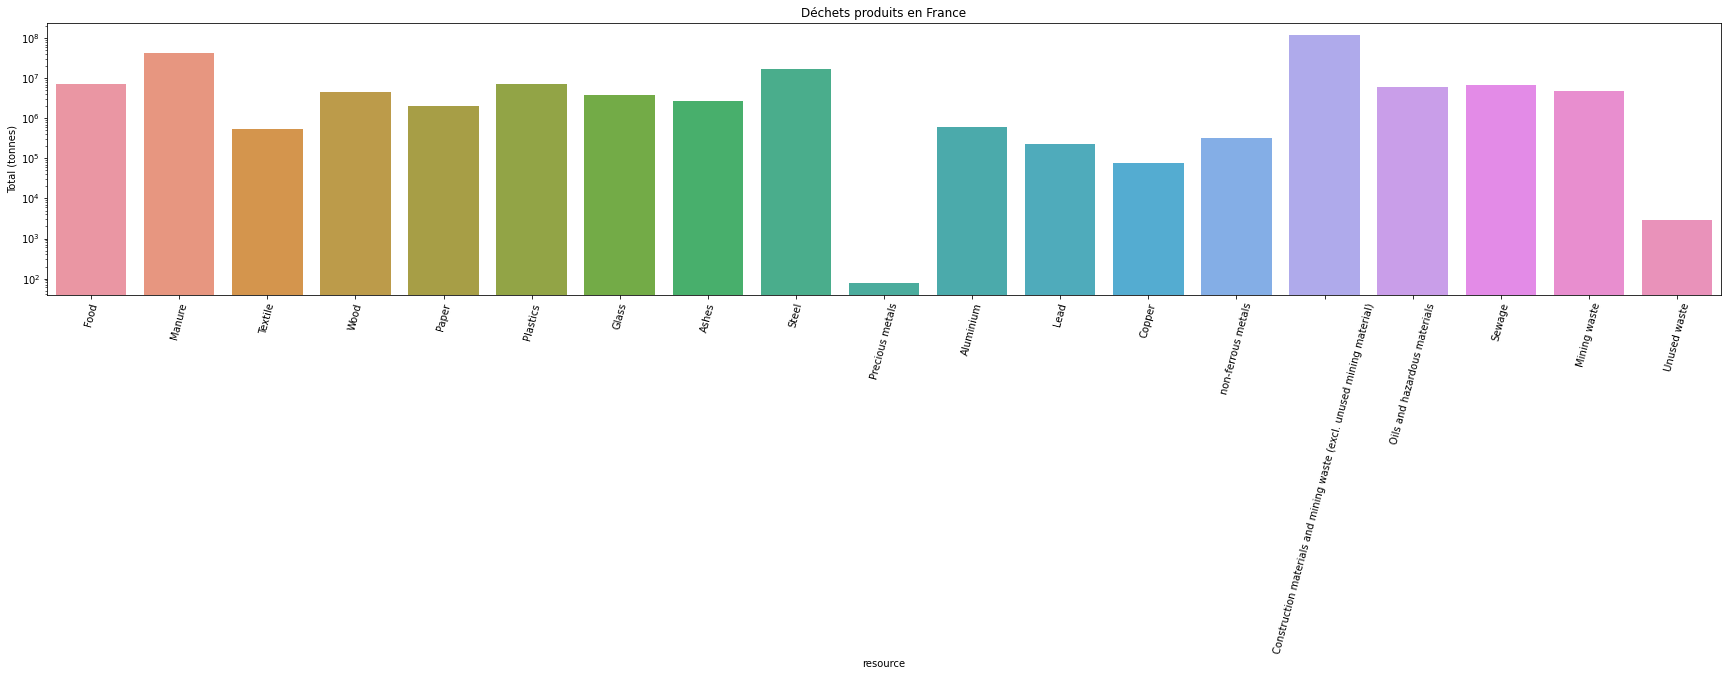

In [485]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = waste_resume_FR, x = 'resource', y = 'Total')
plot.set_yscale("log")
plot.set(ylabel = 'Total (tonnes)', title= 'Déchets produits en France')

[Text(0, 0.5, 'Total (tonnes)'),
 Text(0.5, 1.0, 'Waste created in France each year by sector and by consumer (orange), by the productive activities (blue) or by stock perishing (green)')]

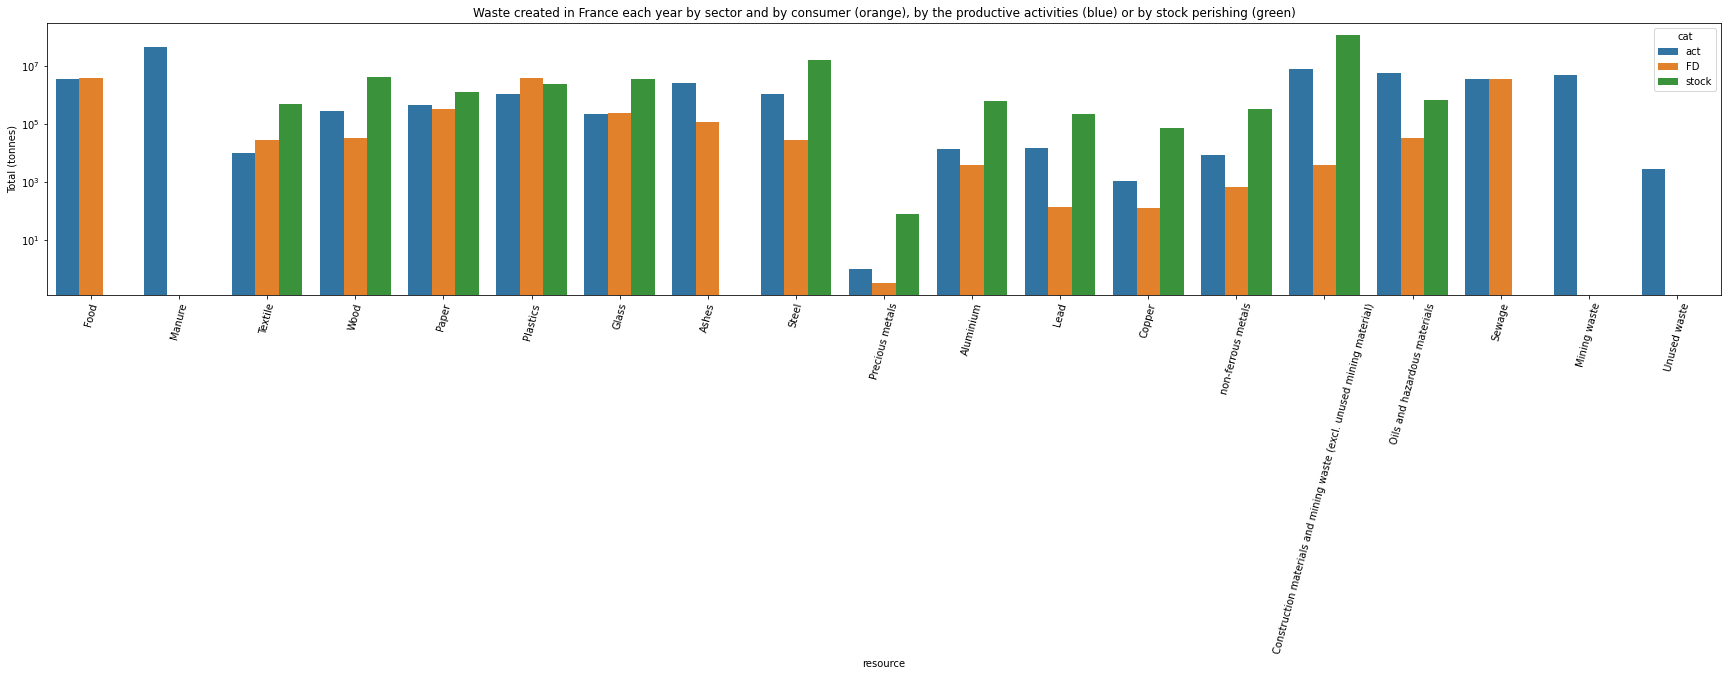

In [486]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = waste_FR, x = 'resource', y = 'Total', hue = 'cat')
plot.set_yscale("log")
plot.set(ylabel = 'Total (tonnes)', title= 'Waste created in France each year by sector and by consumer (orange), by the productive activities (blue) or by stock perishing (green)')



## Coopération internationale pour la gestion des déchets

In [487]:

#création d'une DataFrame caractérisant les échanges de déchets entre pays, se basant sur la liste des activités de recyclages des pays et la liste de leurs inputs internationaux
HUSE_FR = HUSE.iloc[3:,:][search_character('FR',HUSE['Unnamed: 0'][3:])]
HUSE_FR = HUSE_FR.loc[search_character('w', HUSE_FR['Unnamed: 2'])]
HUSE_secondary_FR = HUSE_FR.iloc[search_character('w', HUSE_FR['Unnamed: 2'])]
columns = HUSE_secondary_FR.iloc[:,5:].columns
Waste_used = pd.DataFrame(columns = columns, index = waste_supply_act_FR.index)
waste_list = waste_supply_act_FR.iloc[:,0]
for k,waste in enumerate(waste_list):
    rows = []
    for i in HUSE_secondary_FR.index:
        if waste.lower() in HUSE_secondary_FR.loc[i]['Unnamed: 1'].lower():
            rows.append(i)
            print(waste)

    
    Waste_used.loc[k+3] = HUSE_secondary_FR.loc[rows].iloc[:,5:].sum(axis = 0)
#Cas particulier du plastique: toutes les bouteilles recyclées sont considérées comme étant en plastique
Waste_used.loc[8] = HUSE_secondary_FR.loc[[2529,2489]].iloc[:,5].sum(axis = 0)
        
   

Waste_used_by_country = pd.DataFrame(columns = country_list)
for country in country_list:
    data = Waste_used.loc[:,search_character(country, Waste_used.columns)]
    data = data.sum(axis = 1)
    Waste_used_by_country[country] = data

Waste_used_by_country=  Waste_used_by_country.transpose()
Waste_used_by_country.columns = waste_resume_FR['resource']
Waste_used_by_country['Total'] = Waste_used_by_country.sum(axis = 1)
Waste_used_by_country.index.name = 'countries'



Manure
Manure
Wood
Paper
Glass
Steel
Aluminium
Lead
Copper
non-ferrous metals


c:\Users\marts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\marts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


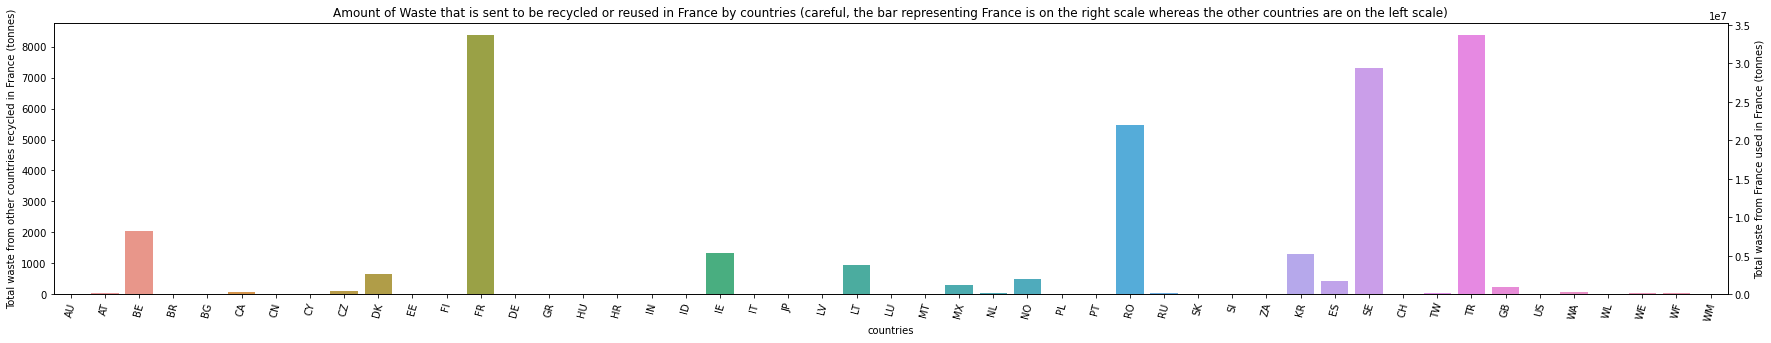

In [488]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot( Waste_used_by_country.drop('FR', axis = 0).index, Waste_used_by_country.drop('FR', axis = 0)['Total'])
plot.set_ylabel('Total waste from other countries recycled in France (tonnes)')
#plot.set(ylabel = 'Total (tonnes)', title= 'Extraction of resources in France')
ax2 = plot.twinx()

g2 =  sn.barplot( Waste_used_by_country.index, Waste_used_by_country['Total'], ax = ax2)
ax2.set_ylabel('Total waste from France used in France (tonnes)')
plot.set_title('Amount of Waste that is sent to be recycled or reused in France by countries (careful, the bar representing France is on the right scale whereas the other countries are on the left scale)')


plt.show()

In [489]:
#Récupération de features sur les déchets
proportion_consommateur_industrie = waste_resume_FR['Total_FD'].sum() / waste_resume_FR['Total_act'].sum()

feature_waste_total_amount = waste_resume_FR.Total.sum()
feature_waste_proportion_reused = waste_resume_FR.Total_used.sum() / feature_waste_total_amount
print(f'la France a produit environ {feature_waste_total_amount} déchets en 2017, avec un ration consommateur final / industrie de  {proportion_consommateur_industrie }')
print(f' {feature_waste_proportion_reused*100} % de ces déchets sont directement réinjectés dans l economie')


la France a produit environ 226491076.561468 déchets en 2017, avec un ration consommateur final / industrie de  0.1573218589835422
 31.57157287099679 % de ces déchets sont directement réinjectés dans l economie


### Commentaire
En réalité, la proportion de déchets recyclés est plus haute d'après les chiffres de l'état, et devrait se trouver autour de 20% (cela varie beaucoup selon les sources)
En réalité, on remarque que si l'on ne prend pas en compte les transformations de stocks en déchets, on tombe sur 20% de déchets recyclés avec notre raisonnement, ce qui est rassurant.

## Divisions en secteurs et intensité de l'économie:

Nous allons à présent diviser en catégories les activités et produits listés dans la base HSUTs. Cela va nous permettre d'avoir une vision plus claire sur les flux économiques de la France, en interaction avec les autres pays. Pour cela, nous allons devoir séparer les données en euros, en tonnes et en Joules, afin de pouvoir les sommer tout en conservant une certaine cohérence (même si sommer des métaux avec du gaz est déjà un peu absurde).
Les catégories définies sont écrites dans la liste suivante:

In [490]:
cat_list = ['Agriculture', 'fossil sources', 'Wood and fossils fuels', 'Matieres', 'petrole derivés', 'Mineral products', 'Metals', 'Machinery and devices',
 'Elec and gaz', 'Construction','transport', 'services', 'waste', 'Public', 'culture', 'other' ]
cat_sep = {
    'Agriculture':['01'], 'fossil sources' : ['10', '11' , '12'], 'Matieres' : ['14', '15', '16', '17', '18', '19'], 'Wood and fossils fuels': ['23.', '22', '21'], 'petrole derivés': ['24'], 'Mineral products':['25', '26'],
    'Metals': ['27'], 'Machinery and devices':['28', '3'], 'Elec and gaz' : ['40.'], 'Construction':['41', '42', '43', '44', '45'],
     'services':['5', '62', '63', '64', '65', '66', '67', '71', '72', '73', '74'],
    'transport':['60', '61'], 'Public':['75', '8', '91'], 'waste':['90'], 'culture':['92'], 'other':['93', '95', '99']
}

 

In [491]:
columns = []
for cat in cat_list:
    for country in country_list:
        columns.append(country + '_' + cat +'act')
rows = []
for cat in cat_list:
    for country in country_list:
        rows.append(country + '_' + cat +'product')


In [492]:
HSUP_cat_mass_c = pd.DataFrame(columns = HSUP.columns[5:], index = rows, dtype = float).fillna(0).transpose()

HSUP_mass = HSUP[search_character('tonnes', HSUP['Unnamed: 4'].astype(str))].copy()
HSUP_mass.iloc[:, 5:] = HSUP_mass.iloc[:, 5:].astype(float)
for k,act in enumerate(HSUP_mass['Unnamed: 2']):  
    print(k)
    country = HSUP_mass['Unnamed: 0'].iloc[k]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    HSUP_cat_mass_c[country + '_' + cat +'product'] = HSUP_cat_mass_c[country + '_' + cat +'product'].add(HSUP_mass.iloc[k,5:])

HSUP_cat_mass_c = HSUP_cat_mass_c.transpose()

HSUP_cat_mass = pd.DataFrame(index = rows, columns = columns).fillna(0)
for k,countries in enumerate(HSUP_mass.columns[5:]):  
    print(k)
    country = countries[:2]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in HSUP[countries][1]:
                    HSUP_cat_mass[country + '_' + cat +'act'] = HSUP_cat_mass_c[countries] +HSUP_cat_mass[country + '_' + cat +'act']





HSUP_cat_money_c = pd.DataFrame(columns = HSUP.columns[5:], index = rows, dtype = float).fillna(0).transpose()

HSUP_money = HSUP[search_character('Meuro', HSUP['Unnamed: 4'].astype(str))].copy()
HSUP_money.iloc[:, 5:] = HSUP_money.iloc[:, 5:].astype(float)
for k,act in enumerate(HSUP_money['Unnamed: 2']):  
    print(k)
    country = HSUP_money['Unnamed: 0'].iloc[k]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    HSUP_cat_money_c[country + '_' + cat +'product'] = HSUP_cat_money_c[country + '_' + cat +'product'].add(HSUP_money.iloc[k,5:])

HSUP_cat_money_c = HSUP_cat_money_c.transpose()

HSUP_cat_money = pd.DataFrame(index = rows, columns = columns).fillna(0)
for k,countries in enumerate(HSUP_money.columns[5:]):  
    print(k)
    country = countries[:2]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in HSUP[countries][1]:
                    HSUP_cat_money[country + '_' + cat +'act'] = HSUP_cat_money_c[countries] +HSUP_cat_money[country + '_' + cat +'act']



HSUP_cat_energy_c = pd.DataFrame(columns = HSUP.columns[5:], index = rows, dtype = float).fillna(0).transpose()

HSUP_energy = HSUP[search_character('TJ', HSUP['Unnamed: 4'].astype(str))].copy()
HSUP_energy.iloc[:, 5:] = HSUP_energy.iloc[:, 5:].astype(float)
for k,act in enumerate(HSUP_energy['Unnamed: 2']):  
    print(k)
    country = HSUP_energy['Unnamed: 0'].iloc[k]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    HSUP_cat_energy_c[country + '_' + cat +'product'] = HSUP_cat_energy_c[country + '_' + cat +'product'].add(HSUP_energy.iloc[k,5:])

HSUP_cat_energy_c = HSUP_cat_energy_c.transpose()

HSUP_cat_energy = pd.DataFrame(index = rows, columns = columns).fillna(0)
for k,countries in enumerate(HSUP_energy.columns[5:]):  
    print(k)
    country = countries[:2]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in HSUP[countries][1]:
                    HSUP_cat_energy[country + '_' + cat +'act'] = HSUP_cat_energy_c[countries] +HSUP_cat_energy[country + '_' + cat +'act']



                    
                



                    
                



                

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [493]:
HUSE_cat_mass_c = pd.DataFrame(columns = HUSE.columns[5:], index = rows, dtype = float).fillna(0).transpose()

HUSE_mass = HUSE[search_character('tonnes', HUSE['Unnamed: 4'].astype(str))].copy()
HUSE_mass.iloc[:, 5:] = HUSE_mass.iloc[:, 5:].astype(float)
for k,act in enumerate(HUSE_mass['Unnamed: 2']):  
    print(k)
    country = HUSE_mass['Unnamed: 0'].iloc[k]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    HUSE_cat_mass_c[country + '_' + cat +'product'] = HUSE_cat_mass_c[country + '_' + cat +'product'].add(HUSE_mass.iloc[k,5:])

HUSE_cat_mass_c = HUSE_cat_mass_c.transpose()

HUSE_cat_mass = pd.DataFrame(index = rows, columns = columns).fillna(0)
for k,countries in enumerate(HUSE_mass.columns[5:]):  
    print(k)
    country = countries[:2]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in HUSE[countries][1]:
                    HUSE_cat_mass[country + '_' + cat +'act'] = HUSE_cat_mass_c[countries] +HUSE_cat_mass[country + '_' + cat +'act']





HUSE_cat_money_c = pd.DataFrame(columns = HUSE.columns[5:], index = rows, dtype = float).fillna(0).transpose()

HUSE_money = HUSE[search_character('Meuro', HUSE['Unnamed: 4'].astype(str))].copy()
HUSE_money.iloc[:, 5:] = HUSE_money.iloc[:, 5:].astype(float)
for k,act in enumerate(HUSE_money['Unnamed: 2']):  
    print(k)
    country = HUSE_money['Unnamed: 0'].iloc[k]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    HUSE_cat_money_c[country + '_' + cat +'product'] = HUSE_cat_money_c[country + '_' + cat +'product'].add(HUSE_money.iloc[k,5:])

HUSE_cat_money_c = HUSE_cat_money_c.transpose()

HUSE_cat_money = pd.DataFrame(index = rows, columns = columns).fillna(0)
for k,countries in enumerate(HUSE_money.columns[5:]):  
    print(k)
    country = countries[:2]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in HUSE[countries][1]:
                    HUSE_cat_money[country + '_' + cat +'act'] = HUSE_cat_money_c[countries] +HUSE_cat_money[country + '_' + cat +'act']



HUSE_cat_energy_c = pd.DataFrame(columns = HUSE.columns[5:], index = rows, dtype = float).fillna(0).transpose()

HUSE_energy = HUSE[search_character('TJ', HUSE['Unnamed: 4'].astype(str))].copy()
HUSE_energy.iloc[:, 5:] = HUSE_energy.iloc[:, 5:].astype(float)
for k,act in enumerate(HUSE_energy['Unnamed: 2']):  
    print(k)
    country = HUSE_energy['Unnamed: 0'].iloc[k]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in act:
                    HUSE_cat_energy_c[country + '_' + cat +'product'] = HUSE_cat_energy_c[country + '_' + cat +'product'].add(HUSE_energy.iloc[k,5:])

HUSE_cat_energy_c = HUSE_cat_energy_c.transpose()

HUSE_cat_energy = pd.DataFrame(index = rows, columns = columns).fillna(0)
for k,countries in enumerate(HUSE_energy.columns[5:]):  
    print(k)
    country = countries[:2]
    for cat in cat_list:
        for sign in cat_sep[cat]:
            if sign in HUSE[countries][1]:
                    HUSE_cat_energy[country + '_' + cat +'act'] = HUSE_cat_energy_c[countries] +HUSE_cat_energy[country + '_' + cat +'act']




HUSE_cat_mass = HUSE_cat_mass.transpose()
HUSE_cat_money = HUSE_cat_money.transpose()
HUSE_cat_energy = HUSE_cat_energy.transpose()              



                    
                



                

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [494]:
internal_supply_flux_money= HSUP_cat_money.loc[:,search_character('FR', HSUP_cat_money.columns)].sum(axis = 1).loc[search_character('FR', HSUP_cat_money.index)]
external_supply_flux_in_money = HSUP_cat_money.sum(axis = 1).loc[search_character('FR', HSUP_cat_money.index)] - internal_supply_flux_money
external_supply_flux_out_money = pd.DataFrame(index = HSUP_cat_energy.index[search_character('FR',HSUP_cat_energy.index)], columns = HSUP_cat_money.loc[:,search_character('FR', HSUP_cat_money.columns)].columns )
data = HSUP_cat_money.loc[:,search_character('FR', HSUP_cat_money.columns)]
for cat in cat_list:
    mask = search_character(cat, HSUP_cat_money.index)
    df = data.loc[mask]
    external_supply_flux_out_money.loc['FR' + '_' + cat + 'product'] = df.sum(axis = 0) 
external_supply_flux_out_money = external_supply_flux_out_money.fillna(0).sum(axis = 1) - internal_supply_flux_money


internal_supply_flux_mass= HSUP_cat_mass.loc[:,search_character('FR', HSUP_cat_mass.columns)].sum(axis = 1).loc[search_character('FR', HSUP_cat_mass.index)]
external_supply_flux_in_mass = HSUP_cat_mass.sum(axis = 1).loc[search_character('FR', HSUP_cat_mass.index)] - internal_supply_flux_mass
external_supply_flux_out_mass = pd.DataFrame(index = HSUP_cat_energy.index[search_character('FR',HSUP_cat_energy.index)], columns = HSUP_cat_mass.loc[:,search_character('FR', HSUP_cat_mass.columns)].columns )
data = HSUP_cat_mass.loc[:,search_character('FR', HSUP_cat_mass.columns)]
for cat in cat_list:
    mask = search_character(cat, HSUP_cat_mass.index)
    df = data.loc[mask]
    external_supply_flux_out_mass.loc['FR' + '_' + cat + 'product'] = df.sum(axis = 0) 
external_supply_flux_out_mass = external_supply_flux_out_mass.fillna(0).sum(axis = 1) - internal_supply_flux_mass

internal_supply_flux_energy= HSUP_cat_energy.loc[:,search_character('FR', HSUP_cat_energy.columns)].sum(axis = 1).loc[search_character('FR', HSUP_cat_energy.index)]
external_supply_flux_in_energy = HSUP_cat_energy.sum(axis = 1).loc[search_character('FR', HSUP_cat_energy.index)] - internal_supply_flux_energy
external_supply_flux_out_energy = pd.DataFrame(index = HSUP_cat_energy.index[search_character('FR',HSUP_cat_energy.index)], columns = HSUP_cat_energy.loc[:,search_character('FR', HSUP_cat_energy.columns)].columns )
data = HSUP_cat_energy.loc[:,search_character('FR', HSUP_cat_energy.columns)]
for cat in cat_list:
    mask = search_character(cat, HSUP_cat_energy.index)
    df = data.loc[mask]
    external_supply_flux_out_energy.loc['FR' + '_' + cat + 'product'] = df.sum(axis = 0) 
external_supply_flux_out_energy = external_supply_flux_out_energy.fillna(0).sum(axis = 1) - internal_supply_flux_energy




In [495]:
internal_use_flux_money= HUSE_cat_money.loc[:,search_character('FR', HUSE_cat_money.columns)].sum(axis = 1).loc[search_character('FR', HUSE_cat_money.index)]
external_use_flux_in_money = HUSE_cat_money.sum(axis = 1).loc[search_character('FR', HUSE_cat_money.index)] - internal_use_flux_money
external_use_flux_out_money = pd.DataFrame(index = HUSE_cat_energy.index[search_character('FR',HUSE_cat_energy.index)], columns = HUSE_cat_money.loc[:,search_character('FR', HUSE_cat_money.columns)].columns )
data = HUSE_cat_money.loc[:,search_character('FR', HUSE_cat_money.columns)]
for cat in cat_list:
    mask = search_character(cat, HUSE_cat_money.index)
    df = data.loc[mask]
    external_use_flux_out_money.loc['FR' + '_' + cat + 'act'] = df.sum(axis = 0) 
external_use_flux_out_money = external_use_flux_out_money.fillna(0).sum(axis = 1) - internal_use_flux_money


internal_use_flux_mass= HUSE_cat_mass.loc[:,search_character('FR', HUSE_cat_mass.columns)].sum(axis = 1).loc[search_character('FR', HUSE_cat_mass.index)]
external_use_flux_in_mass = HUSE_cat_mass.sum(axis = 1).loc[search_character('FR', HUSE_cat_mass.index)] - internal_use_flux_mass
external_use_flux_out_mass = pd.DataFrame(index = HUSE_cat_energy.index[search_character('FR',HUSE_cat_energy.index)], columns = HUSE_cat_mass.loc[:,search_character('FR', HUSE_cat_mass.columns)].columns )
data = HUSE_cat_mass.loc[:,search_character('FR', HUSE_cat_mass.columns)]
for cat in cat_list:
    mask = search_character(cat, HUSE_cat_mass.index)
    df = data.loc[mask]
    external_use_flux_out_mass.loc['FR' + '_' + cat + 'act'] = df.sum(axis = 0) 
external_use_flux_out_mass = external_use_flux_out_mass.fillna(0).sum(axis = 1) - internal_use_flux_mass

internal_use_flux_energy= HUSE_cat_energy.loc[:,search_character('FR', HUSE_cat_energy.columns)].sum(axis = 1).loc[search_character('FR', HUSE_cat_energy.index)]
external_use_flux_in_energy = HUSE_cat_energy.sum(axis = 1).loc[search_character('FR', HUSE_cat_energy.index)] - internal_use_flux_energy
external_use_flux_out_energy = pd.DataFrame(index = HUSE_cat_energy.index[search_character('FR',HUSE_cat_energy.index)], columns = HUSE_cat_energy.loc[:,search_character('FR', HUSE_cat_energy.columns)].columns )
data = HUSE_cat_energy.loc[:,search_character('FR', HUSE_cat_energy.columns)]
for cat in cat_list:
    mask = search_character(cat, HUSE_cat_energy.index)
    df = data.loc[mask]
    external_use_flux_out_energy.loc['FR' + '_' + cat + 'act'] = df.sum(axis = 0) 
external_use_flux_out_energy = external_use_flux_out_energy.fillna(0).sum(axis = 1) - internal_use_flux_energy




## Intensity related features
Nous allons appeler "intensité" énergétique ou massique la somme des flux internes et des flux entrants de masse ou d'énergie. 
Je pense que cela peut être un indicateur de la taille du marché interne du pays, et du volume de son industrie.
Nous en aurons confirmation lors de l'étude "internationale" dans le second notebook.
De même, nous appelerons richesse ou intensité économique la somme des flux monétaires internes et sortants d'une économie. J'espère que cela sera un indicateur plus ou moins fidèle de la richesse d'un pays.
Contrairement au PIB, cet indicateur ne prend en considération uniquement une somme de flux financiers, et n'intègre aucune caractéristique sociale ou environnementale. Il est donc forcément très simpliste. 
J'espère cependant que nous pourrons décrire dans une certaine mesure des indicateurs comme les émissions de GES à partir notamment de ces features.

[Text(0, 0.5, 'Masse (Tonnes)'),
 Text(0.5, 0, 'Secteur'),
 Text(0.5, 1.0, 'Intensité de l economie française en flux de matière')]

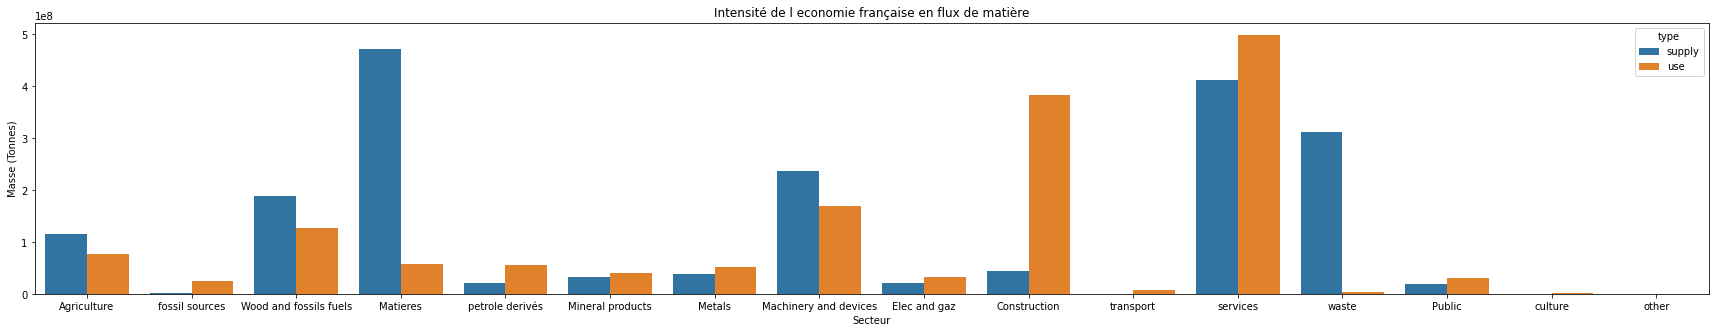

In [496]:
intensite_eco_use_secteur_FR_mass = pd.DataFrame(columns = ['type', 'values', 'secteur'])
intensite_eco_use_secteur_FR_mass['values'] = internal_use_flux_mass + external_use_flux_in_mass
intensite_eco_use_secteur_FR_mass['type'] = 'use'
intensite_eco_use_secteur_FR_mass['secteur'] = cat_list


intensite_eco_supply_secteur_FR_mass = pd.DataFrame(columns = ['type', 'values', 'secteur'])
intensite_eco_supply_secteur_FR_mass['values'] = internal_supply_flux_mass + external_supply_flux_in_mass
intensite_eco_supply_secteur_FR_mass['type'] = 'supply'
intensite_eco_supply_secteur_FR_mass['secteur'] = cat_list


intensite_eco_secteur_FR_mass = pd.concat([intensite_eco_supply_secteur_FR_mass, intensite_eco_use_secteur_FR_mass])


fig,ax = plt.subplots(figsize = (30,5))
sn.barplot(data = intensite_eco_secteur_FR_mass, x = 'secteur', y = 'values', hue = 'type')
ax.set(ylabel = 'Masse (Tonnes)', xlabel = 'Secteur', title= 'Intensité de l economie française en flux de matière')


[Text(0, 0.5, 'Monnaie (Meuro)'),
 Text(0.5, 0, 'Secteur'),
 Text(0.5, 1.0, 'Intensité de l economie française en flux monétaires')]

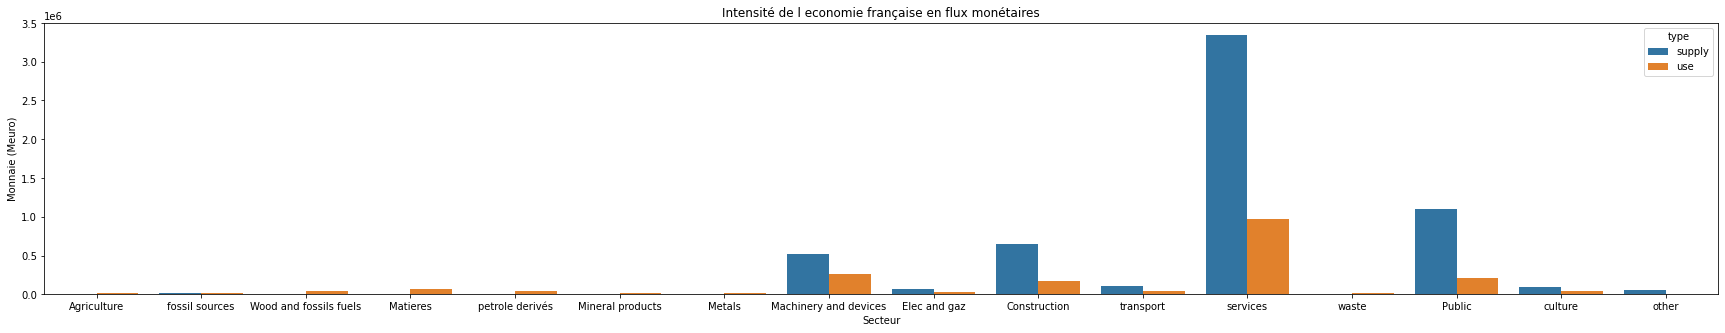

In [497]:
intensite_eco_use_secteur_FR_money = pd.DataFrame(columns = ['type', 'values', 'secteur'])
intensite_eco_use_secteur_FR_money['values'] = internal_use_flux_money + external_use_flux_out_money
intensite_eco_use_secteur_FR_money['type'] = 'use'
intensite_eco_use_secteur_FR_money['secteur'] = cat_list


intensite_eco_supply_secteur_FR_money = pd.DataFrame(columns = ['type', 'values', 'secteur'])
intensite_eco_supply_secteur_FR_money['values'] = internal_supply_flux_money + external_supply_flux_out_money
intensite_eco_supply_secteur_FR_money['type'] = 'supply'
intensite_eco_supply_secteur_FR_money['secteur'] = cat_list


intensite_eco_secteur_FR_money = pd.concat([intensite_eco_supply_secteur_FR_money, intensite_eco_use_secteur_FR_money])


fig,ax = plt.subplots(figsize = (30,5))
sn.barplot(data = intensite_eco_secteur_FR_money, x = 'secteur', y = 'values', hue = 'type')
ax.set(ylabel = 'Monnaie (Meuro)', xlabel = 'Secteur', title= 'Intensité de l economie française en flux monétaires')


[Text(0, 0.5, 'Energie (TJ)'),
 Text(0.5, 0, 'Secteur'),
 Text(0.5, 1.0, 'Intensité de l economie française en énergie')]

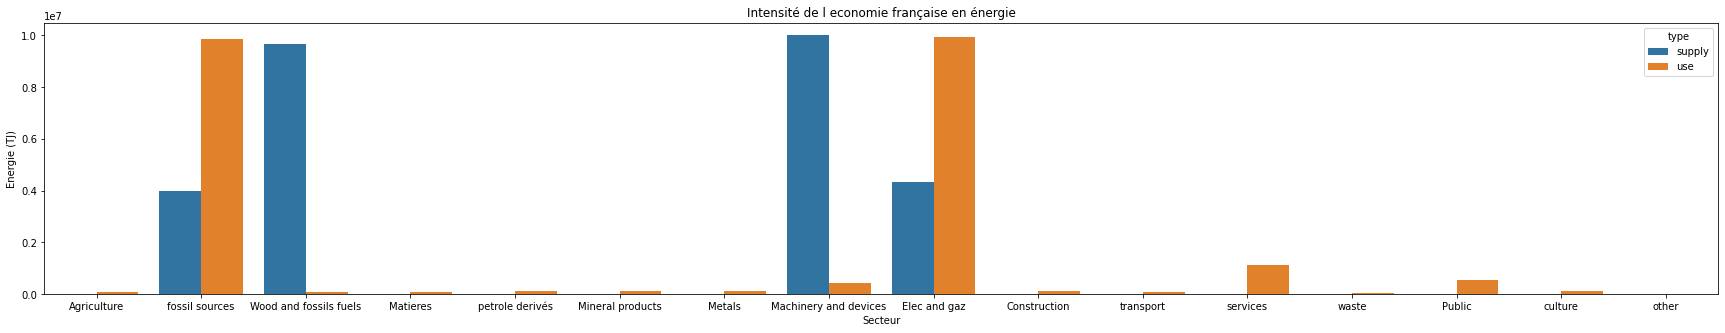

In [498]:
intensite_eco_use_secteur_FR_energy = pd.DataFrame(columns = ['type', 'values', 'secteur'])
intensite_eco_use_secteur_FR_energy['values'] = internal_use_flux_energy + external_use_flux_in_energy
intensite_eco_use_secteur_FR_energy['type'] = 'use'
intensite_eco_use_secteur_FR_energy['secteur'] = cat_list


intensite_eco_supply_secteur_FR_energy = pd.DataFrame(columns = ['type', 'values', 'secteur'])
intensite_eco_supply_secteur_FR_energy['values'] = internal_supply_flux_energy + external_supply_flux_in_energy
intensite_eco_supply_secteur_FR_energy['type'] = 'supply'
intensite_eco_supply_secteur_FR_energy['secteur'] = cat_list


intensite_eco_secteur_FR_energy = pd.concat([intensite_eco_supply_secteur_FR_energy, intensite_eco_use_secteur_FR_energy])


fig,ax = plt.subplots(figsize = (30,5))
sn.barplot(data = intensite_eco_secteur_FR_energy, x = 'secteur', y = 'values', hue = 'type')
ax.set(ylabel = 'Energie (TJ)', xlabel = 'Secteur', title= 'Intensité de l economie française en énergie')


# Investissements à l'étranger
La feature qui suit permet de décrire la balance commerciale de la France:

In [499]:
r = external_use_flux_in_money.sum() / external_use_flux_out_money.sum()
print(f"la valeur du rapport entre l'argent étranger entrant en France et l'argent Français entrant à l'étranger est {r}")
print(f"la France réalisait donc plus d'investissements dans des activités à l'étranger qu'elle n'en reçoit pour ses activités en 2011 (cohérent avecc les statistiques de l'Insee, mais le rapport est un peu haut ) ")

la valeur du rapport entre l'argent étranger entrant en France et l'argent Français entrant à l'étranger est 0.8635130668112962
la France réalisait donc plus d'investissements dans des activités à l'étranger qu'elle n'en reçoit pour ses activités en 2011 (cohérent avecc les statistiques de l'Insee, mais le rapport est un peu haut ) 


In [500]:
df_FR_supply_international = pd.DataFrame()

df_FR_supply_international['internal_supply_flux_money'] = internal_supply_flux_money
df_FR_supply_international['external_supply_flux_in_money'] = external_supply_flux_in_money
df_FR_supply_international['external_supply_flux_out_money'] = external_supply_flux_out_money

df_FR_supply_international['internal_supply_flux_mass'] = internal_supply_flux_mass
df_FR_supply_international['external_supply_flux_in_mass'] = external_supply_flux_in_mass
df_FR_supply_international['external_supply_flux_out_mass'] = external_supply_flux_out_mass

df_FR_supply_international['internal_supply_flux_energy'] = internal_supply_flux_energy
df_FR_supply_international['external_supply_flux_in_energy'] = external_supply_flux_in_energy
df_FR_supply_international['external_supply_flux_out_energy'] = external_supply_flux_out_energy




df_FR_supply_international['Total_energy'] = internal_supply_flux_energy + external_supply_flux_in_energy - external_supply_flux_out_energy
df_FR_supply_international['Total_mass'] = internal_supply_flux_mass + external_supply_flux_in_mass - external_supply_flux_out_mass
df_FR_supply_international['Total_money'] = internal_supply_flux_money + external_supply_flux_in_money - external_supply_flux_out_money


df_FR_supply_international['acti'] = cat_list



In [501]:
df_FR_use_international = pd.DataFrame()


df_FR_use_international['internal_use_flux_money'] = internal_use_flux_money
df_FR_use_international['external_use_flux_in_money'] = external_use_flux_in_money
df_FR_use_international['external_use_flux_out_money'] = external_use_flux_out_money

df_FR_use_international['internal_use_flux_mass'] = internal_use_flux_mass
df_FR_use_international['external_use_flux_in_mass'] = external_use_flux_in_mass
df_FR_use_international['external_use_flux_out_mass'] = external_use_flux_out_mass

df_FR_use_international['internal_use_flux_energy'] = internal_use_flux_energy
df_FR_use_international['external_use_flux_in_energy'] = external_use_flux_in_energy
df_FR_use_international['external_use_flux_out_energy'] = external_use_flux_out_energy

df_FR_use_international['Total_energy'] = internal_use_flux_energy + external_use_flux_in_energy - external_use_flux_out_energy
df_FR_use_international['Total_mass'] = internal_use_flux_mass + external_use_flux_in_mass - external_use_flux_out_mass
df_FR_use_international['Total_money'] = internal_use_flux_money + external_use_flux_in_money - external_use_flux_out_money


df_FR_use_international['acti'] = cat_list


[Text(0, 0.5, 'Total (TJ)'),
 Text(0.5, 1.0, 'Energetic intensity of activities in France')]

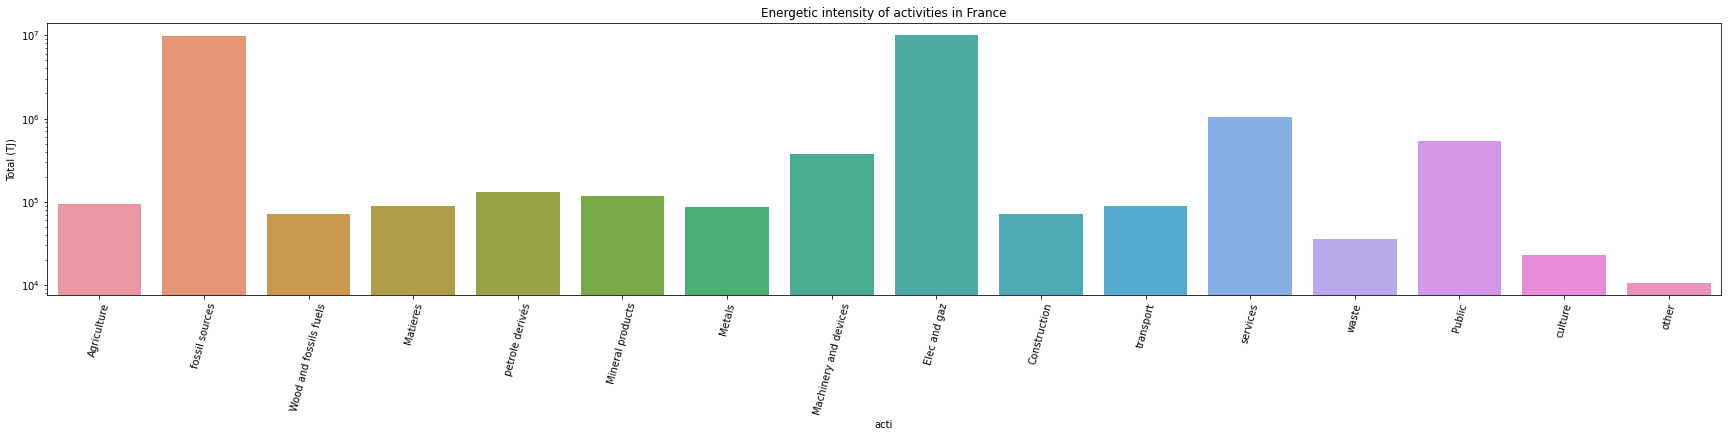

In [502]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df_FR_use_international, x = 'acti', y = 'Total_energy', )
plot.set_yscale("log")
plot.set(ylabel = 'Total (TJ)', title= 'Energetic intensity of activities in France')

### Remarque:
Ces valeurs paraissent extrêmement élevées, d'autant que j'ai l'impression au vu de la table use que l'on parle ici d'énergie secondaire, et non pas primaire, ce qui devrait presque diviser par deux la consommation.

[Text(0, 0.5, 'Total (tonnes)'),
 Text(0.5, 1.0, 'Matter intensity of activities in France')]

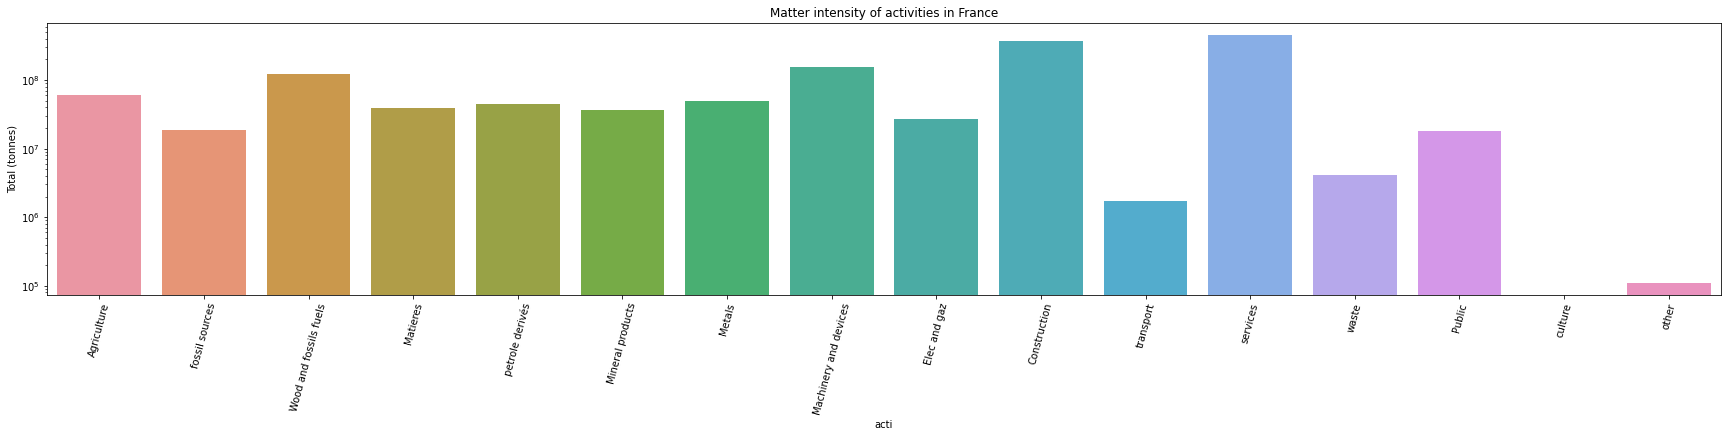

In [503]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df_FR_use_international, x = 'acti', y = 'Total_mass', )
plot.set_yscale("log")
plot.set(ylabel = 'Total (tonnes)', title= 'Matter intensity of activities in France')

[Text(0, 0.5, 'Total (Meuro)'),
 Text(0.5, 1.0, 'Monetary intensity of activities in France')]

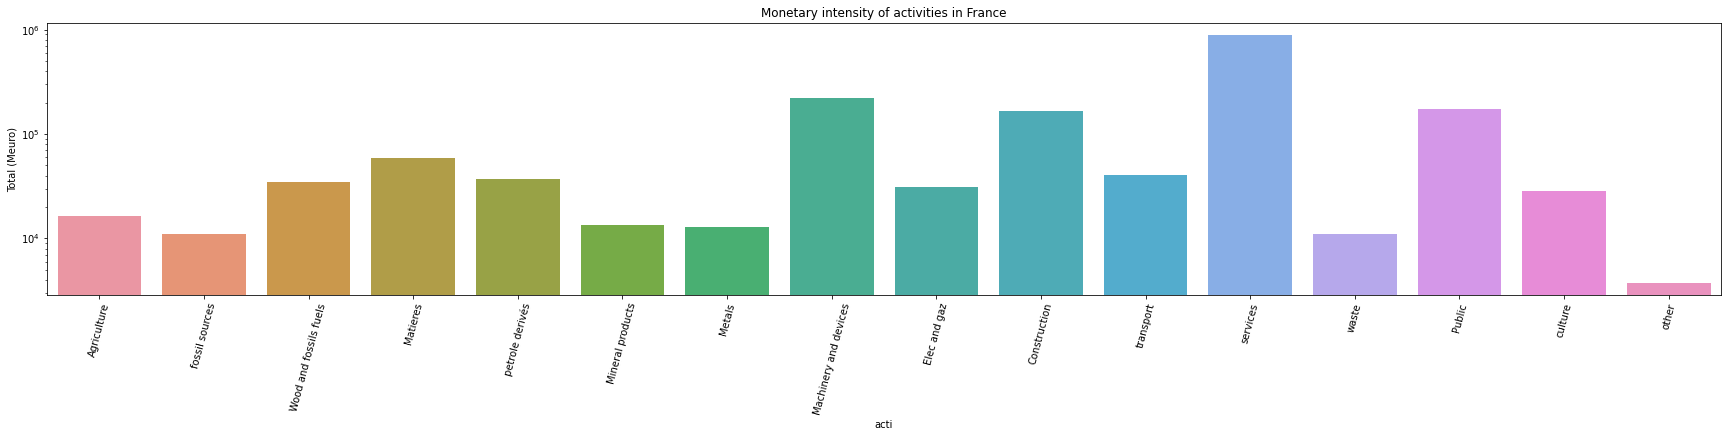

In [504]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df_FR_use_international, x = 'acti', y = 'Total_money', )
plot.set_yscale("log")
plot.set(ylabel = 'Total (Meuro)', title= 'Monetary intensity of activities in France')

[Text(0, 0.5, 'Total (TJ)'),
 Text(0.5, 1.0, 'Energetic intensity of products in France')]

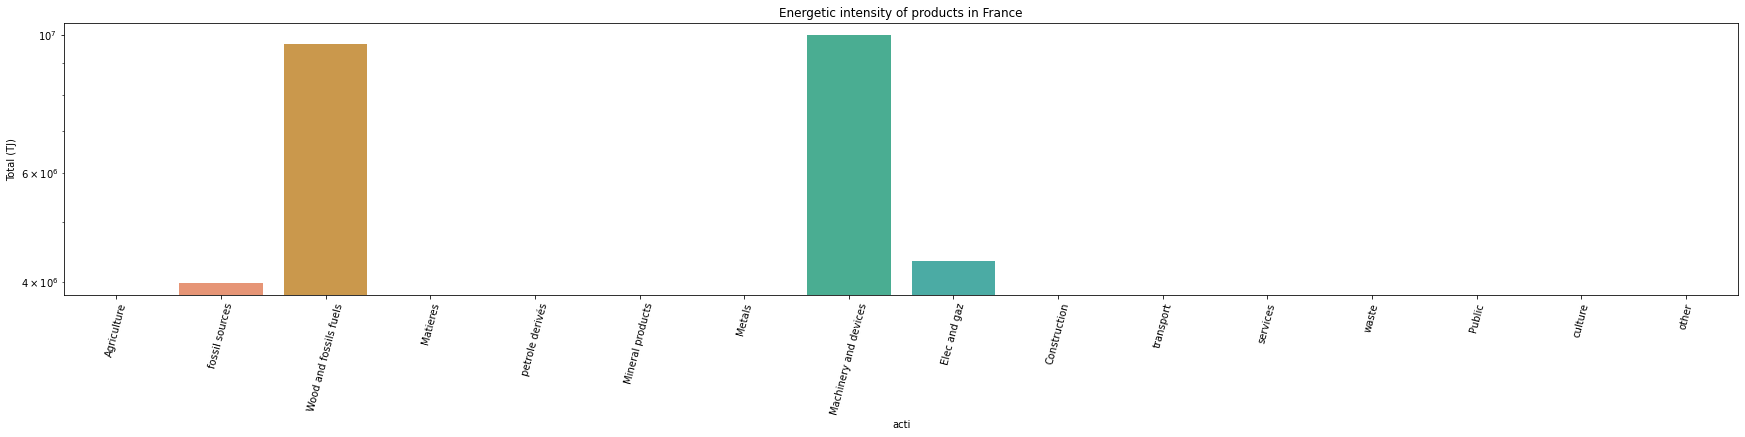

In [505]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df_FR_supply_international, x = 'acti', y = 'Total_energy', )
plot.set_yscale("log")
plot.set(ylabel = 'Total (TJ)', title= 'Energetic intensity of products in France')

[Text(0, 0.5, 'Total (TJ)'),
 Text(0.5, 1.0, 'Resource intensity of activities in France')]

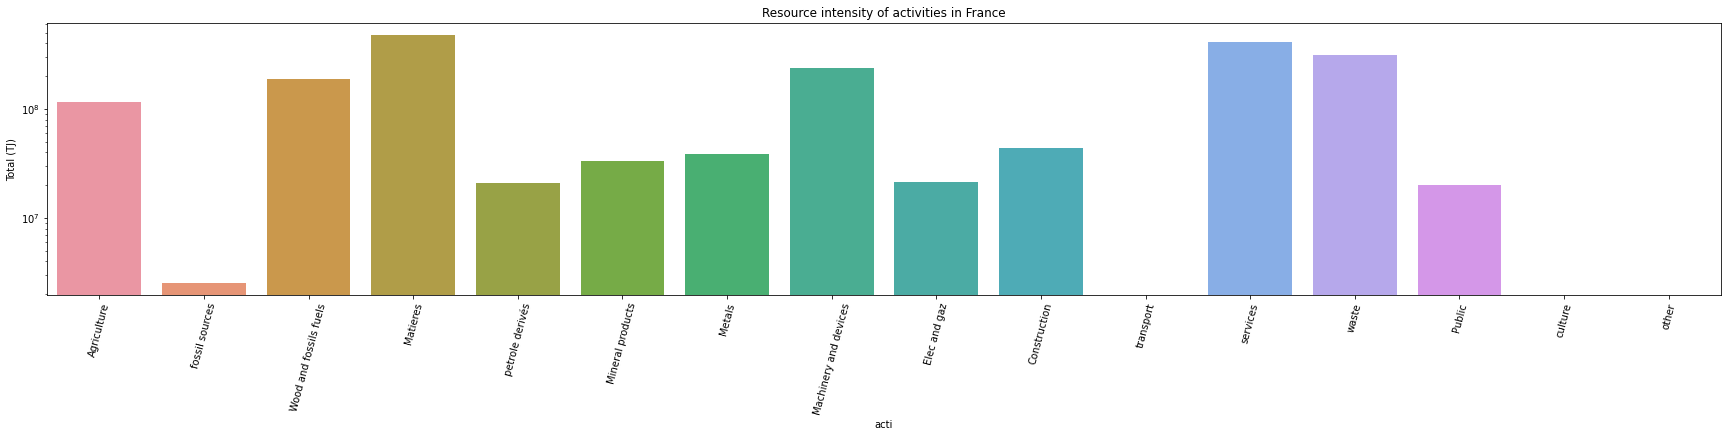

In [506]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df_FR_supply_international, x = 'acti', y = 'Total_mass', )
plot.set_yscale("log")
plot.set(ylabel = 'Total (TJ)', title= 'Resource intensity of activities in France')

[Text(0, 0.5, 'Total (TJ)'),
 Text(0.5, 1.0, 'Monetary intensity of activities in France')]

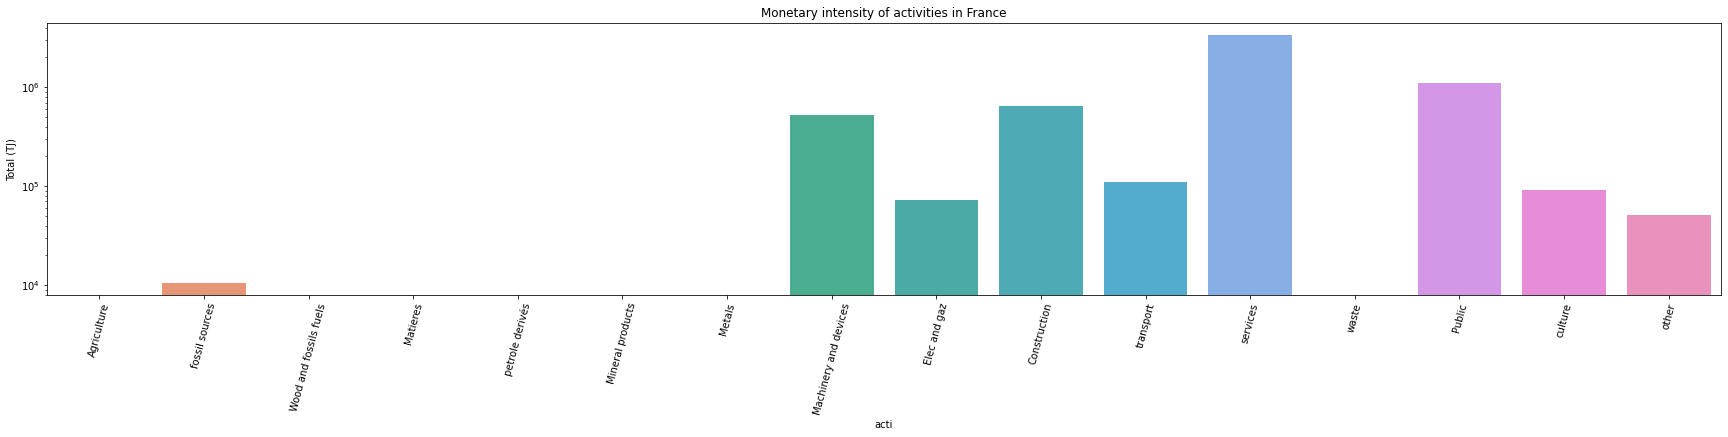

In [507]:
fig, ax = plt.subplots(figsize=(30, 5))
plt.xticks(rotation='75')
plot = sn.barplot(data = df_FR_supply_international, x = 'acti', y = 'Total_money', )
plot.set_yscale("log")
plot.set(ylabel = 'Total (TJ)', title= 'Monetary intensity of activities in France')

Les features construits à partir de cette étude seront:


In [508]:
feature_use_internal_mass_FR = internal_use_flux_mass
feature_use_external_mass_in_FR = external_use_flux_in_mass
feature_use_external_mass_out_FR = external_use_flux_out_mass

feature_use_internal_money_FR = internal_use_flux_money
feature_use_external_money_in_FR = external_use_flux_in_money
feature_use_external_money_out_FR = external_use_flux_out_money

feature_use_internal_energy_FR = internal_use_flux_energy
feature_use_external_energy_in_FR = external_use_flux_in_energy
feature_use_external_energy_out_FR = external_use_flux_out_energy

feature_supply_internal_mass_FR = internal_supply_flux_mass
feature_supply_external_mass_in_FR = external_supply_flux_in_mass
feature_supply_external_mass_out_FR = external_supply_flux_out_mass

feature_supply_internal_money_FR = internal_supply_flux_money
feature_supply_external_money_in_FR = external_supply_flux_in_money
feature_supply_external_money_out_FR = external_supply_flux_out_money

feature_supply_internal_energy_FR = internal_supply_flux_energy
feature_supply_external_energy_in_FR = external_supply_flux_in_energy
feature_supply_external_energy_out_FR = external_supply_flux_out_energy


Nous allons donc résumer les quelques features obtenus dans une DataFrame. 

In [509]:
liste_features = ['use_internal_mass', 'use_external_mass_in', 'use_external_mass_out', 'use_internal_money', 'use_external_money_in', 'use_external_money_out',
                    'use_internal_energy', 'use_external_energy_in', 'use_external_energy_out',
                  'supply_internal_mass', 'supply_external_mass_in', 'supply_external_mass_out', 'supply_internal_money', 'supply_external_money_in', 'supply_external_money_out',
                    'supply_internal_energy', 'supply_external_energy_in', 'supply_external_energy_out',   
                    'waste_total_amount'  , 'waste_proportion_reused', 'resource' , 'GES']             
df_features = pd.DataFrame(index = liste_features)
liste_features_FR = [internal_use_flux_mass, external_use_flux_in_mass,external_use_flux_out_mass,internal_use_flux_money,external_use_flux_in_money,external_use_flux_out_money,
        internal_supply_flux_energy,external_supply_flux_in_energy,external_supply_flux_out_energy,
                  internal_supply_flux_mass, external_supply_flux_in_mass,external_supply_flux_out_mass,internal_supply_flux_money,external_supply_flux_in_money,external_supply_flux_out_money,
        internal_supply_flux_energy,external_supply_flux_in_energy,external_supply_flux_out_energy , 
        feature_waste_total_amount, feature_waste_proportion_reused,feature_resource, feature_GES]
df_features['FR'] = liste_features_FR
